# Proyecto de Machine Learning

## <span style="color:green">1. Descargar los datos</span>

In [2]:
##Importamos las librerías principales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
## Definimos una función para extaer los datos
#DWONLOAD_ROOT es la base del Github donde se estará descargando la base de datos.

data_base= "hospitalizaciones_train.csv"
test="hospitalizaciones_test.csv"
DOWNLOAD_ROOT= "https://raw.githubusercontent.com/mayteet/Proyecto_Individual_2/main/"


#Complementos con la dirección específica de la base de datos que queremos.

def extraer_datos(root,database):
    csv_path= root+database
    return pd.read_csv(csv_path)

In [4]:

# Archivo con el que se hace la prueba final
prueba_final= extraer_datos(DOWNLOAD_ROOT, test)

# Archivo para realizar el proceso de entrenamiento
data= extraer_datos(DOWNLOAD_ROOT, data_base)

#Archivo para revisar datos
df1= extraer_datos(DOWNLOAD_ROOT, data_base)


## <span style="color:green">2. Vistazo de los datos</span>

In [4]:
#Obtener información de los datos
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [5]:
df1.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


Analizamos los datos numéricos

In [7]:
#Usamos un describe para evaluar variables como promedio, desviación estándar, valores máximos, y mínimos
df1.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


In [8]:
#Analizamos la calidad de lso datos para identificar valores vacíos y tipos de variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

- Datos limpios
- Observamos que hay 6 columnas con datos numéricos
- Patient id es un dato que podría influir negativamente en algún modelo que se quiera implementar

Análisis de los datos numéricos

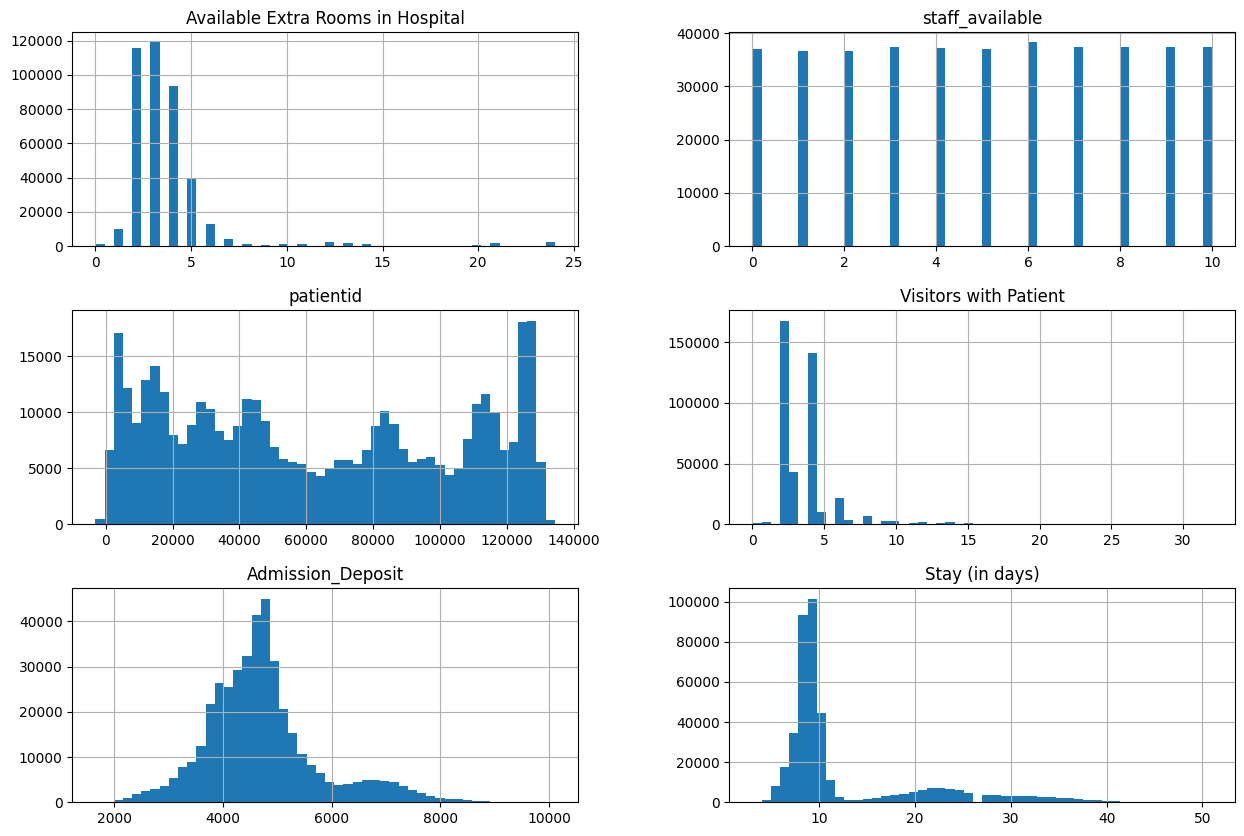

In [9]:
#Histogramas
%matplotlib inline
df1.hist(bins=50, figsize=(15,10))
plt.show()

Observamos que:
- Las habitaciones extras en los hospitales se encuentra entre 3-5.
- Los pacientes tienen entre 3-5 visitas.
- El depósito de admisión se encuentra en mayor cantidad entre los 4000-6000 unidades monetarias
- El periodo de estadía de un paciente es menor a 10 días

Análisis de los datos categóricos

<AxesSubplot: xlabel='Age', ylabel='Count'>

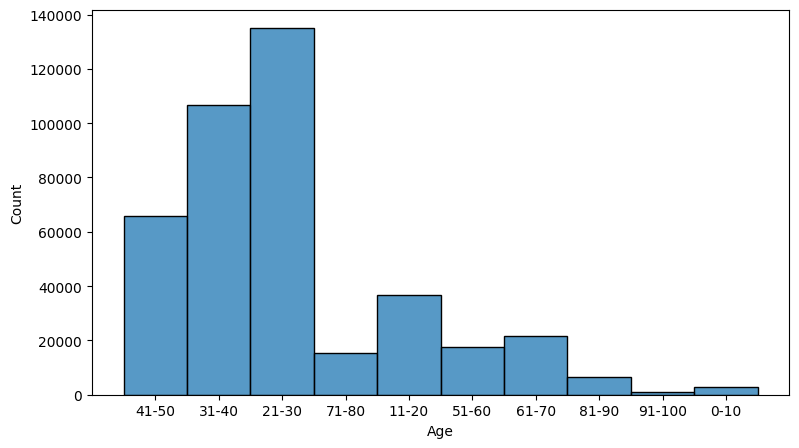

In [17]:
#Edad
df2= df1.sort_values(ascending= True)
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="Age")

<AxesSubplot: xlabel='gender', ylabel='Count'>

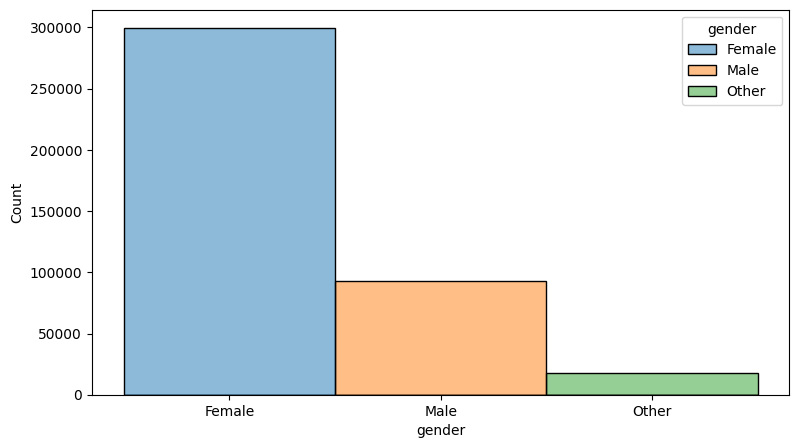

In [20]:
#Genero
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="gender", hue="gender")

<AxesSubplot: xlabel='Type of Admission', ylabel='Count'>

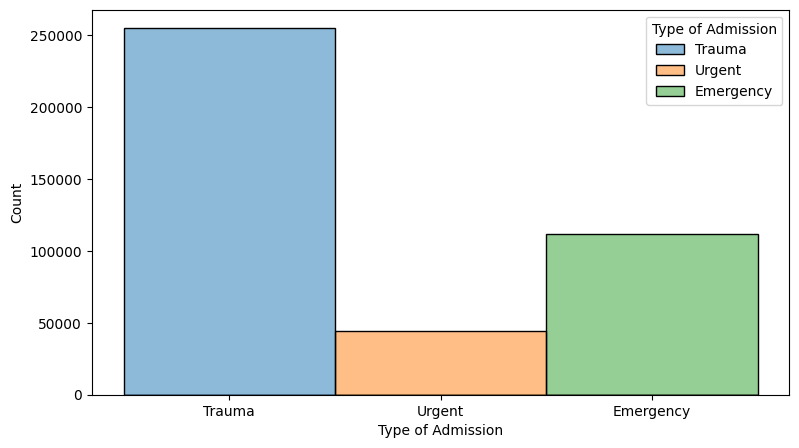

In [21]:
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="Type of Admission", hue="Type of Admission")

<AxesSubplot: xlabel='Severity of Illness', ylabel='Count'>

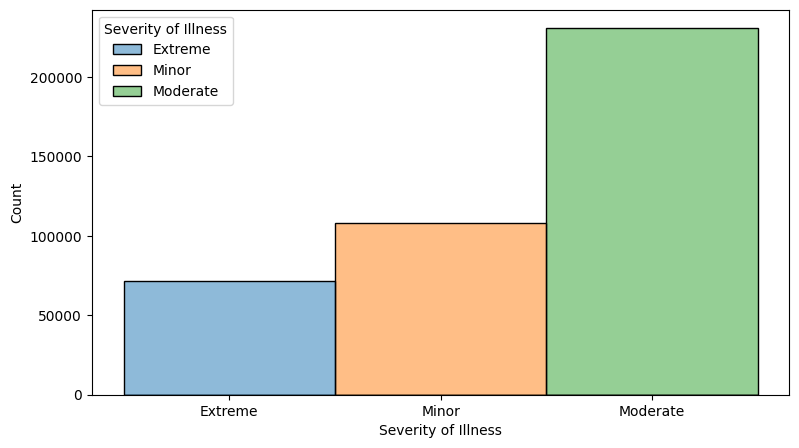

In [22]:
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="Severity of Illness", hue="Severity of Illness")

<AxesSubplot: xlabel='health_conditions', ylabel='Count'>

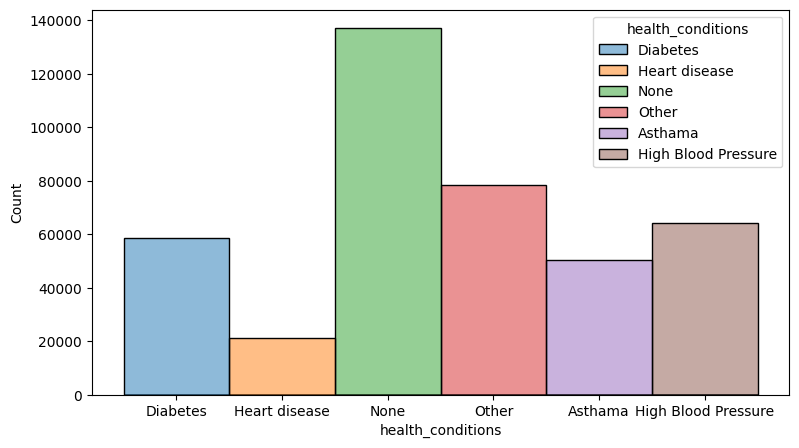

In [23]:
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="health_conditions", hue="health_conditions")

<AxesSubplot: xlabel='Insurance', ylabel='Count'>

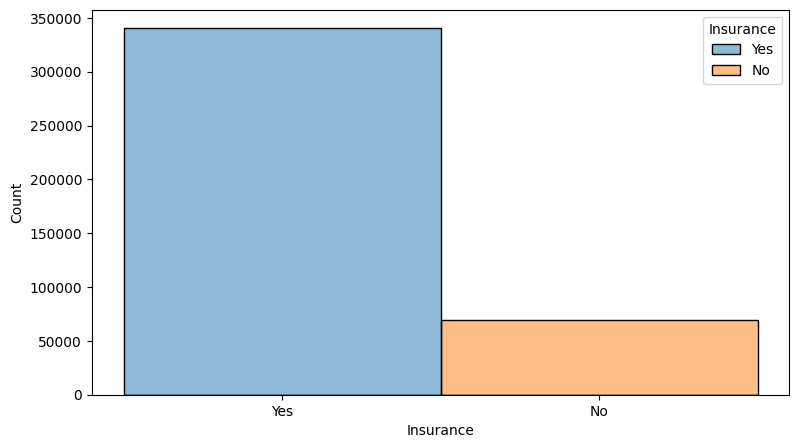

In [24]:
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="Insurance", hue="Insurance")

In [ ]:
g= sns.pairplot(df1, hue="Age")

De los datos categóricos se observa que:
- El 80% aprox de entradas se encuentran en el rango de 21-50 años.
- Entran mucho más mujeres que hombres.
- La principal causa de entrada es por trauma y el nivel de severidad es moderado.
- Casi un 30% entra sin condiciones médicas preexistentes.
- Más del 80% cuenta con seguro


Análisis con respecto a mi variable de interés: estancia en el hospital

<AxesSubplot: xlabel='Age', ylabel='Stay (in days)'>

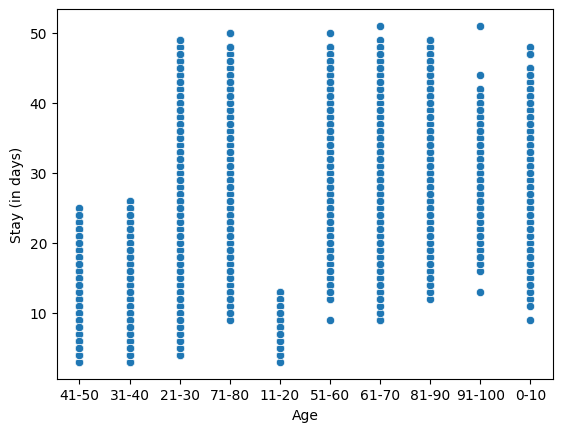

In [38]:
# Age and stay in hospital
sns.scatterplot(data= df1, x="Age", y="Stay (in days)")

<AxesSubplot: xlabel='gender', ylabel='Stay (in days)'>

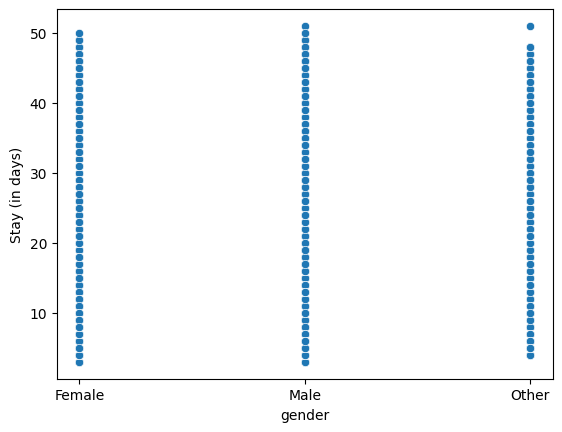

In [35]:
sns.scatterplot(data= df1, x="gender", y="Stay (in days)")

<AxesSubplot: xlabel='Department', ylabel='Stay (in days)'>

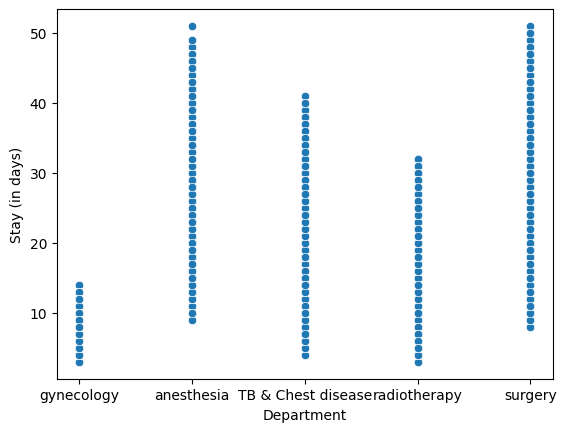

In [39]:
sns.scatterplot(data= df1, x="Department", y="Stay (in days)")

<AxesSubplot: xlabel='doctor_name', ylabel='Stay (in days)'>

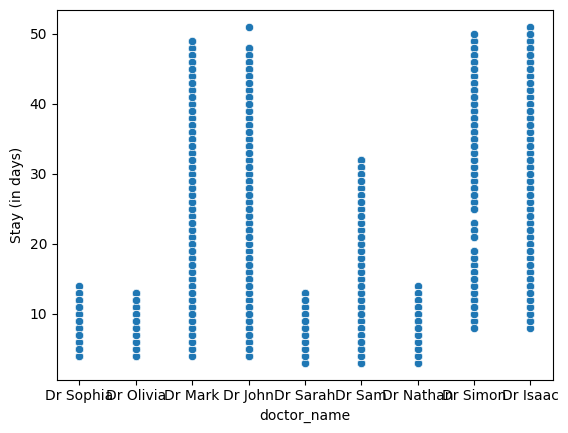

In [41]:
sns.scatterplot(data= df1, x="doctor_name", y="Stay (in days)")

In [42]:
df1.doctor_name.unique()

array(['Dr Sophia', 'Dr Olivia', 'Dr Mark', 'Dr John', 'Dr Sarah',
       'Dr Sam', 'Dr Nathan', 'Dr Simon', 'Dr Isaac'], dtype=object)

<AxesSubplot: xlabel='Severity of Illness', ylabel='Stay (in days)'>

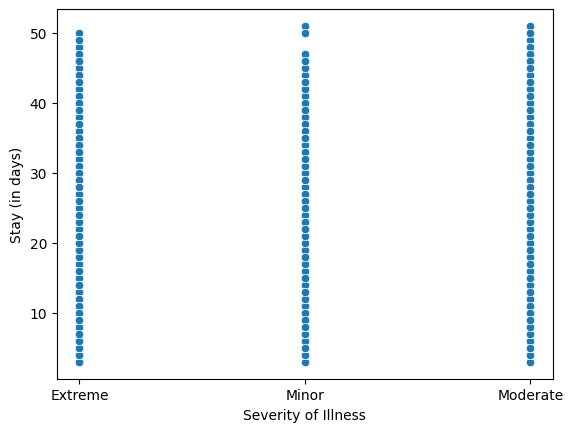

In [29]:
sns.scatterplot(data= df1, x="Severity of Illness", y="Stay (in days)")

<AxesSubplot: xlabel='Type of Admission', ylabel='Stay (in days)'>

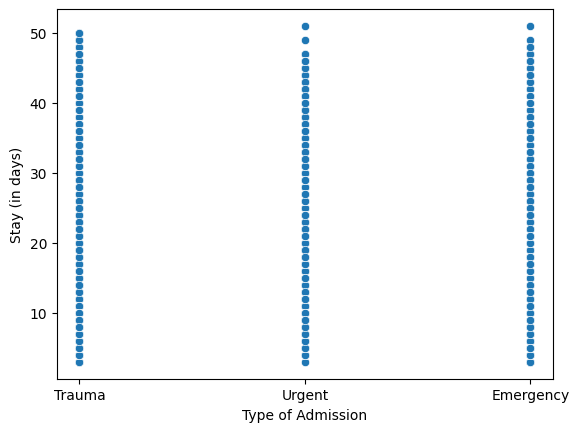

In [32]:
sns.scatterplot(data= df1, x="Type of Admission", y="Stay (in days)")

Del análisis de relación con la variable de interés:
- Las personas en el rango de 31-50 años pasan menos de 26 días en el hospital. 
- Las personas en el rango de 11-20 pasan menos de 13 días en el hospital.

- El tiempo de estancia en ginecología es menor a 15 días
- El tiempo de estancia en anesthesia es mayor a 10 días
- El tiempo en TB ches es menor a 40 días
- El tiempo en radiotherapia es menor a 30 días
- El tiempo en cirugía es mayor a 10 días

- Las doctores Sofia, Olivia, Sara, Nathan, atienden pacientes que estarán menos de 15 días

Las variables de mayor relación serían: la edad, departamento, y doctor

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

In [43]:
#Importamos la función
from sklearn.model_selection import train_test_split
set_ent, set_prueba=train_test_split(data, test_size = .3, random_state=45)
print(len(set_ent))
print(len(set_prueba))

287000
123000


👀 Se ha realizado la división del set de entrenamiento y prueba en 30% para pruebas y 70% para entrenamiento. Asimismo, se ha implementado un seed de 45 para que pueda replicarse este proceso.

## <span style="color:green">4. Medir la Correlación </span>


In [44]:
#Crear una matriz de correlación linear de variables numéricas
df2= df1[["Stay (in days)","Admission_Deposit", "Visitors with Patient", "staff_available","Available Extra Rooms in Hospital"]]
matriz=df2.corr(method="pearson")
matriz

#Comparar correlacion
matriz["Stay (in days)"].sort_values(ascending=False)

Stay (in days)                       1.000000
Admission_Deposit                    0.043899
Visitors with Patient                0.027284
staff_available                      0.006673
Available Extra Rooms in Hospital   -0.019383
Name: Stay (in days), dtype: float64

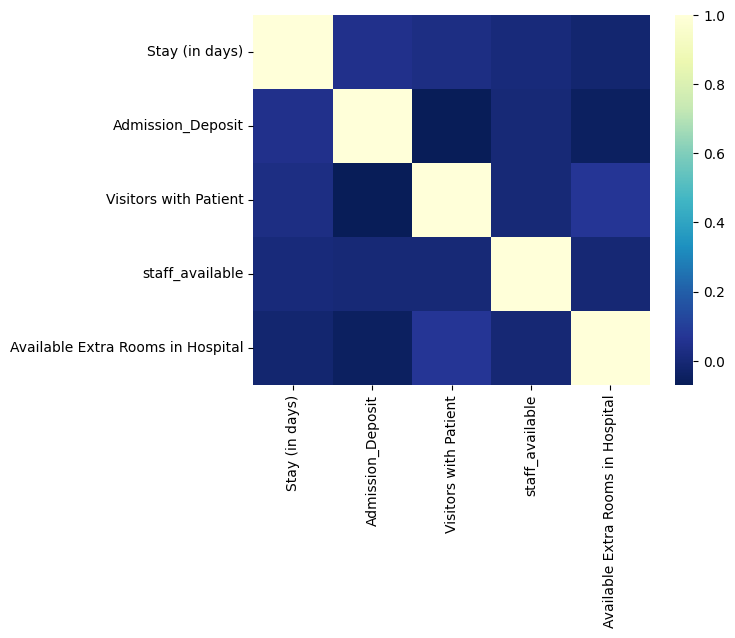

In [45]:
import seaborn as sns

#Crear vector
plt=sns.heatmap(matriz, cmap="YlGnBu_r")

#Graficar

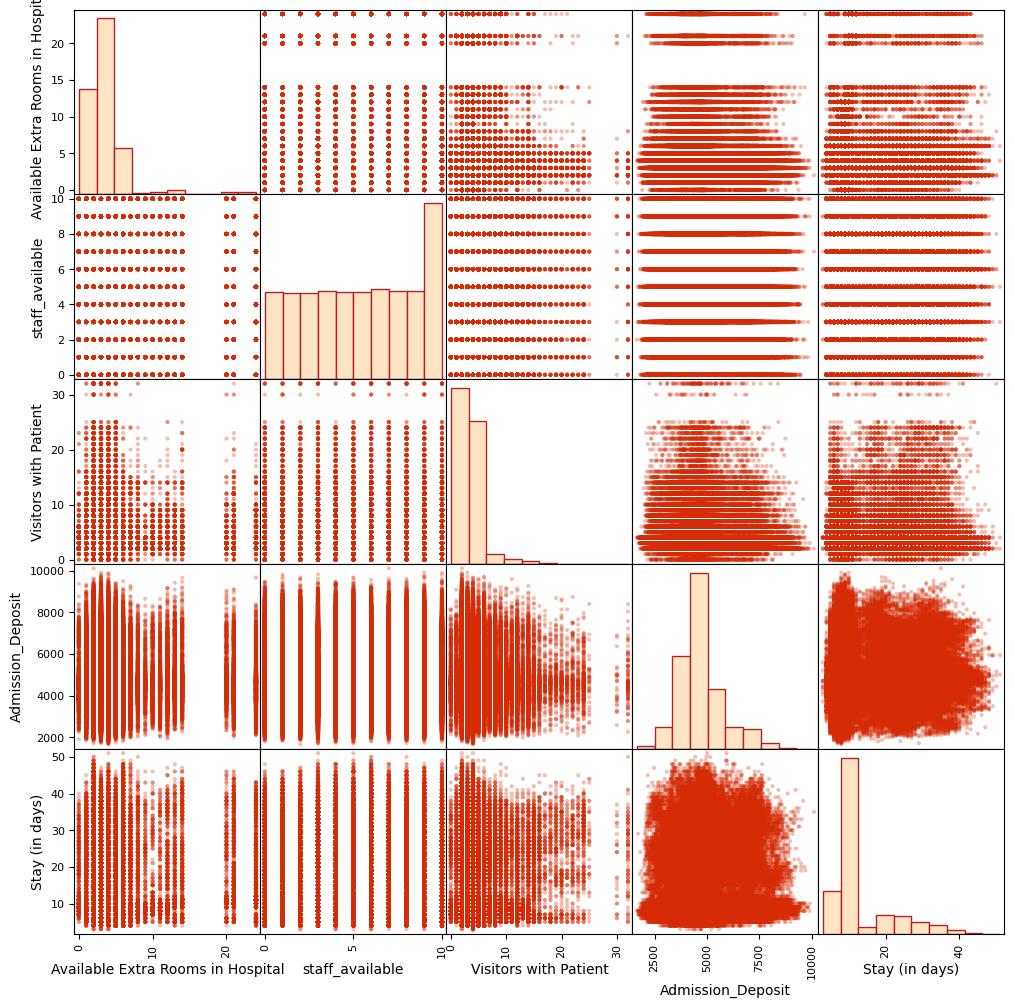

In [46]:
from pandas.plotting import scatter_matrix

columns = ["Available Extra Rooms in Hospital", "staff_available","Visitors with Patient", "Admission_Deposit", "Stay (in days)"]
scatter_matrix(df2[columns], figsize=(12,12), color="#D52B06", alpha=0.3, 
               hist_kwds= {'color':["bisque"], "edgecolor":"firebrick"});

Haciendo la evaluación de correlación lineal entre las variables numéricas, se muestra muy baja correlación entre los datos.

## <span style="color:green">5. Transformaciones </span>


In [47]:
#Crear Dataframe de predictor y variable a predecir
df_label= set_ent["Stay (in days)"]
df = set_ent.drop(["Stay (in days)", "patientid"], axis=1)

In [48]:
#Dividimos las variables en categóricas y numéricas

df_cat= df[["Department", "Ward_Facility_Code", "doctor_name", "Age", "gender", "Type of Admission", "Severity of Illness", "health_conditions", "Insurance"]]
df_num= df[["Available Extra Rooms in Hospital", "staff_available","Visitors with Patient", "Admission_Deposit"]]

## <span style="color:green">6. Pipeline </span>


In [56]:
#Construimos un pipeline que permita convertir las variables categoricas en variables binarias, para ello usamos column transformer, pipeline y OneHotEncoder

#Importamos las librerías de utilidad
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [113]:
#Definimos las variables categóricas de interés

cat=["Department", "Ward_Facility_Code", "doctor_name","Age", "gender", "Type of Admission", "Severity of Illness", "health_conditions", "Insurance"]

# Preparamos nuestros datos de entrenamiento X y de validacion y
y= set_ent["Stay (in days)"]
X=set_ent.drop(["patientid","Stay (in days)"], axis=1)

#Preparamos el pipeline a traves de un columntransformer para poder seleccionar solo las columnas de interes para el OneHotEncoding
pipeline= ColumnTransformer([
    ("cat", OneHotEncoder(), cat)   
])




In [128]:
datos_transformados= pipeline.fit_transform(X)

prueba_final= prueba_final.drop(["patientid"], axis=1)
dato_predecir= pipeline.fit_transform(prueba_final)

## <span style="color:green">7. Ajustar el modelo y errores iniciales </span>


In [129]:
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(datos_transformados, df_label)
reg_lin.predict(dato_predecir)

array([ 9.66773757, 27.17431933, 22.65779481, ...,  8.85060329,
       21.8439649 ,  7.7396514 ])

In [150]:
#Arbol de decision
from sklearn.tree import DecisionTreeRegressor
reg_arbol= DecisionTreeRegressor()
reg_arbol.fit(datos_transformados, df_label)
prediccion=reg_arbol.predict(dato_predecir)

In [131]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
reg_forest= RandomForestRegressor()
reg_forest.fit(datos_transformados, df_label)
reg_forest.predict(dato_predecir)

array([ 8.58778956, 23.76618248, 22.01948252, ...,  8.83268944,
       21.80568341,  8.94018633])

## <span style="color:green">8. K-fold cross validation </span>


Realizamos una validación cruzada para asegurarnos de no tener overfitting o underfitting con nuestro modelo. 
Se utiliza 10 particiones. El modelo elegido es el de arbol de decision, pues tuvo un bajo nivel de error, y el costo computacional fue menor comparado con un bosque aleatorio


In [141]:
from sklearn.model_selection import cross_val_score
resultados= cross_val_score(reg_arbol, datos_transformados, df_label, scoring="neg_mean_squared_error", cv=10)
rmse= np.sqrt(-resultados)
rmse.mean()/df_label.mean()

0.1545556142162785

## <span style="color:green">9. Afinar modelo - Grid Search </span>


In [ ]:
#Grid Search se usa para encontrar los mejores hiperparametros que puedan ir con mi modelo. Para ello 


from sklearn.model_selection import GridSearchCV
param_grid=[{
    "criterion":("gini","entropy"), 
    "max_depth":(4,6,8,12),
   
}]
grid_search= GridSearchCV(reg_forest, param_grid, scoring="accuracy", return_train_score=True)

grid_search.fit(datos_transformados, df_label)

In [ ]:
grid_search.best_params_

In [ ]:
np.sqrt(-grid_search.best_score)/df_label.mean()

## <span style="color:green">10. Matriz de confusion </span>


In [ ]:
from sklearn.metrics import confusion_matrix
Matriz_de_confusion= confusion_matrix(y, prediccion)

## <span style="color:green">11. Test </span>


In [162]:
resul= pd.DataFrame(prediccion)
resul= resul.rename(columns={0:"pred"})

In [165]:
resul

,pred
0,8.589981
1,23.000000
2,21.923077
3,8.595528
4,33.000000
...,...
89995,8.660920
89996,8.698630
89997,8.850746
89998,21.666667


In [166]:
resul.to_csv("mayteet.csv", index=False)